<a href="https://colab.research.google.com/github/chiardy90/Health-Insurance-Cost-Forecast/blob/main/%E9%86%AB%E7%99%82%E8%B2%BB%E7%94%A8%E9%A0%90%E6%B8%AC_SVR_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Health-Insurance-Cost-Forecast
* [Kaggle Link](https://www.kaggle.com/mirichoi0218/insurance)

## Step 1: Read the medical expense data set

In [113]:
import pandas as pd

Dataset = pd.read_csv("insurance.csv")
Dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Step 2: Data Visualization and Feature Engineering.
*   Handling missing values
*   Simple feature engineering after visualization




In [114]:
# Check field for NaN
for index, col in enumerate(Dataset.columns):
  print(f"第{index+1}個欄位 {col} 的缺失值共有 {Dataset[col].isnull().sum()} 筆")

第1個欄位 age 的缺失值共有 0 筆
第2個欄位 sex 的缺失值共有 0 筆
第3個欄位 bmi 的缺失值共有 0 筆
第4個欄位 children 的缺失值共有 0 筆
第5個欄位 smoker 的缺失值共有 0 筆
第6個欄位 region 的缺失值共有 0 筆
第7個欄位 charges 的缺失值共有 0 筆


### 第一個欄位(age)

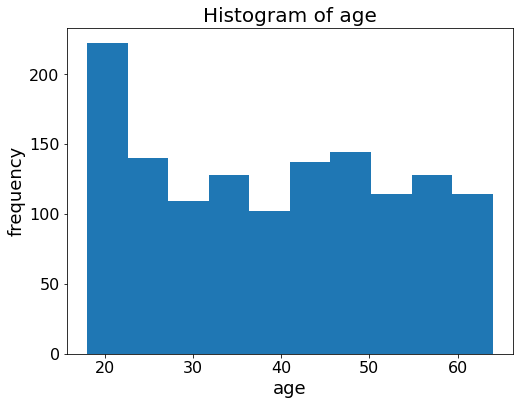

In [115]:
# Dataset["age"]
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.hist(Dataset["age"], bins=10)
plt.title("Histogram of age", fontsize=20)
plt.xlabel("age", fontsize=18)
plt.ylabel("frequency", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

### 第二個欄位(sex)

male      676
female    662
Name: sex, dtype: int64


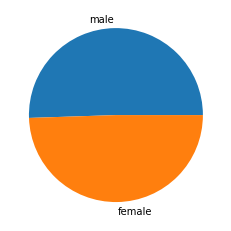

In [116]:
# Dataset["sex"], value_counts()
import matplotlib.pyplot as plt
print(Dataset["sex"].value_counts())
plt.pie(Dataset["sex"].value_counts(), labels=["male", "female"])
plt.show()

### 第三個欄位(bmi)

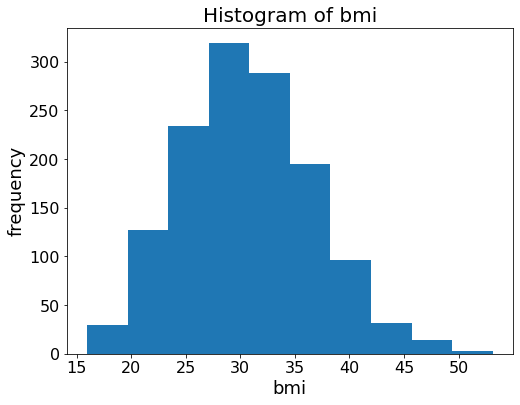

In [117]:
# Dataset["bmi"]
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.hist(Dataset["bmi"], bins=10)
plt.title("Histogram of bmi", fontsize=20)
plt.xlabel("bmi", fontsize=18)
plt.ylabel("frequency", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

### 第四個欄位(children)

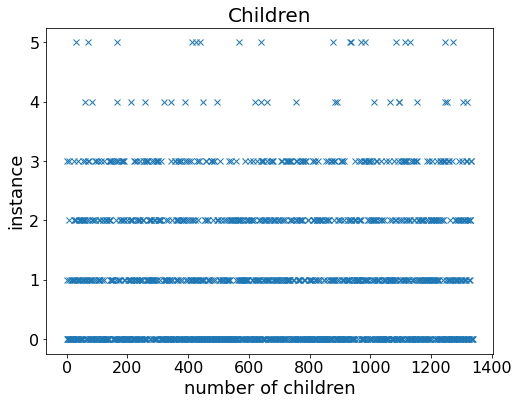

In [118]:
# Dataset["children"]
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(Dataset["children"], "x")
plt.title("Children", fontsize=20)
plt.xlabel("number of children", fontsize=18)
plt.ylabel("instance", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

### 第五個欄位(smoker)

no     1064
yes     274
Name: smoker, dtype: int64


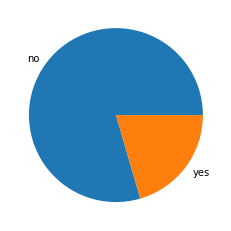

In [119]:
# Dataset["smoker"], value_counts()
import matplotlib.pyplot as plt
print(Dataset["smoker"].value_counts())
plt.pie(Dataset["smoker"].value_counts(), labels=["no", "yes"])
plt.show()

### 第六個欄位(region)

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


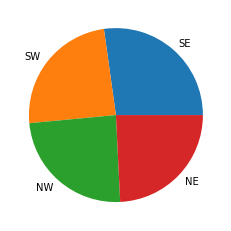

In [120]:
# Dataset["region"], value_counts()
import matplotlib.pyplot as plt
print(Dataset["region"].value_counts())
plt.pie(Dataset["region"].value_counts(), labels=["SE","SW","NW","NE"])
plt.show()

### 第七個欄位(charges)

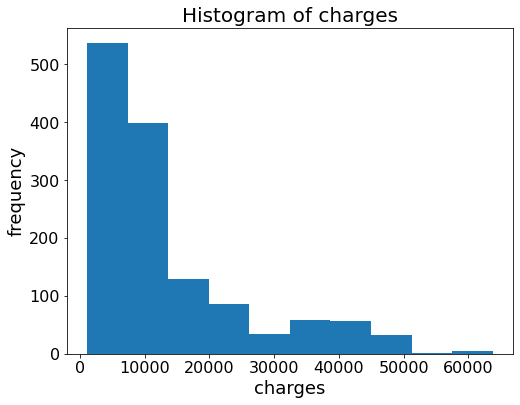

In [121]:
# Dataset["charges"]
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.hist(Dataset["charges"], bins=10)
plt.title("Histogram of charges", fontsize=20)
plt.xlabel("charges", fontsize=18)
plt.ylabel("frequency", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

## Step 3: Identify Numerical and Categorical Features

In [122]:
for col in Dataset.columns:
  col_type = Dataset[col].dtypes
  print(col_type)

int64
object
float64
int64
object
object
float64


In [123]:
numerical_attributes = []
categorical_attributes = []

for col in Dataset.columns:
  col_type = Dataset[col].dtypes
  #print(col_type)

  if col_type == "float64" or col_type == "int64":
    numerical_attributes.append(col)
  elif col_type == "object":
    categorical_attributes.append(col)
    
# We will do feautre scaling for X later, so remove Y first.
numerical_attributes.remove("charges")
  
print(f"數值型的欄位有:{numerical_attributes}")
print(f"類別型的欄位有{categorical_attributes}")

數值型的欄位有:['age', 'bmi', 'children']
類別型的欄位有['sex', 'smoker', 'region']


## Step 4 : Perform One-Hot Encoding

In [124]:
print(f"One-Hot Encoding 前有 {Dataset.shape[1]} 個欄位")
One_Hot_Dataset = pd.get_dummies(Dataset)
print(f"One-Hot Encoding 後有 {One_Hot_Dataset.shape[1]} 個欄位")
One_Hot_Dataset.head()

One-Hot Encoding 前有 7 個欄位
One-Hot Encoding 後有 12 個欄位


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


## Step 5: Perform data segmentation

In [125]:
# 提示：drop([column_name], axis=1), train_test_split(X, Y, test_size)

# 引入這部份會用到的套件
from sklearn.model_selection import train_test_split

# 區分 X 與 Y，記得要使用 One_Hot_Dataset 指定欄位或是 drop
Y = One_Hot_Dataset["charges"]
X = One_Hot_Dataset.drop(["charges"], axis=1)

# 進行資料切分
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

print(f"訓練資料集(X) {X_train.shape}")
print(f"訓練資料集(Y) {Y_train.shape}")
print(f"驗證資料集(X) {X_test.shape}")
print(f"驗證資料集(Y) {Y_test.shape}")

訓練資料集(X) (1070, 11)
訓練資料集(Y) (1070,)
驗證資料集(X) (268, 11)
驗證資料集(Y) (268,)


## Step 6: Perform Feature Scaling

In [126]:
# 引入這部份會使用到的套件
from sklearn.preprocessing import StandardScaler

# 取出 訓練與驗證資料集的 數值型資料，使用 numerical_attributes
X_train_numerical = X_train[numerical_attributes]
X_test_numerical = X_test[numerical_attributes]

# 實例化，然後使用 訓練資料集 fit (同時針對 X 與 Y)
x_scaler = StandardScaler().fit(X_train_numerical)
y_scaler = StandardScaler().fit(Y_train.to_numpy().reshape(-1,1))

# 使用 scaler 對 訓練資料集 與 驗證資料集 transform (同時針對 X 與 Y)
X_train_trans = x_scaler.transform(X_train_numerical)
X_test_trans = x_scaler.transform(X_test_numerical)
Y_train_trans = y_scaler.transform(Y_train.to_numpy().reshape(-1,1))
Y_test_trans = y_scaler.transform(Y_test.to_numpy().reshape(-1,1))

# 對欄位進行覆寫 （針對 X）
X_train[numerical_attributes] = X_train_trans
X_test[numerical_attributes] = X_test_trans

# 後續 fit 使用 X_train 與 Y_train_trans
# 後續 predict 使用 X_test 與 Y_test_trans

## Step 7: Fit the support vector regression model

In [127]:
from sklearn.svm import SVR

SVR_Algorithm = SVR(kernel="rbf", C=10, gamma=0.1)
SVR_Model = SVR_Algorithm.fit(X_train, Y_train_trans.reshape(-1))


## Step 8: Predict and evaluate

In [128]:
# 提示：predict, inverse_transform, reshape(-1,1), zip(), reshape(-1), round(), abs(), len()

# 預測
SVR_Predictions = SVR_Model.predict(X_test)

# 對 SVR_Predictions 與 Y_test 做 Inverse Transform，需要用上 y_scaler
SVR_Predictions_inv = y_scaler.inverse_transform(SVR_Predictions.reshape(-1,1))
Y_test_inv = y_scaler.inverse_transform(Y_test_trans)

# 統計平均誤差，與列印出前50筆預測值與答案
Total_Error = 0
counter = 0

for pred, ans in zip(SVR_Predictions_inv.reshape(-1), Y_test.to_numpy().reshape(-1)):
  if counter < 50:
    print(f"第 {counter} 筆預測結果:{round(pred)} vs. 實際答案:{round(ans)}")
  Total_Error = Total_Error + abs(pred-ans) # abs 是絕對值的意思
  counter = counter + 1

print(f"\n平均誤差值:{round(Total_Error/len(SVR_Predictions))}")

第 0 筆預測結果:8560 vs. 實際答案:7986
第 1 筆預測結果:24080 vs. 實際答案:24107
第 2 筆預測結果:4548 vs. 實際答案:3491
第 3 筆預測結果:7338 vs. 實際答案:5980
第 4 筆預測結果:5980 vs. 實際答案:4618
第 5 筆預測結果:4368 vs. 實際答案:3310
第 6 筆預測結果:11332 vs. 實際答案:10226
第 7 筆預測結果:10530 vs. 實際答案:9378
第 8 筆預測結果:3227 vs. 實際答案:2154
第 9 筆預測結果:42525 vs. 實際答案:38793
第 10 筆預測結果:10628 vs. 實際答案:9716
第 11 筆預測結果:35498 vs. 實際答案:38415
第 12 筆預測結果:8138 vs. 實際答案:7051
第 13 筆預測結果:2995 vs. 實際答案:1726
第 14 筆預測結果:6977 vs. 實際答案:6199
第 15 筆預測結果:4856 vs. 實際答案:3990
第 16 筆預測結果:8183 vs. 實際答案:8060
第 17 筆預測結果:8868 vs. 實際答案:7651
第 18 筆預測結果:3121 vs. 實際答案:1729
第 19 筆預測結果:5184 vs. 實際答案:19442
第 20 筆預測結果:3106 vs. 實際答案:2104
第 21 筆預測結果:11426 vs. 實際答案:10198
第 22 筆預測結果:5666 vs. 實際答案:4838
第 23 筆預測結果:2767 vs. 實際答案:1640
第 24 筆預測結果:8217 vs. 實際答案:7419
第 25 筆預測結果:5534 vs. 實際答案:4686
第 26 筆預測結果:3581 vs. 實際答案:2497
第 27 筆預測結果:6115 vs. 實際答案:5312
第 28 筆預測結果:3774 vs. 實際答案:2643
第 29 筆預測結果:9740 vs. 實際答案:8570
第 30 筆預測結果:11073 vs. 實際答案:9866
第 31 筆預測結果:10976 vs. 實際答案:6666
第 32 筆預測結果:5596 vs. 實際答案:4828
第 33 

## Step 9: Experiment with different parameter combinations

In [129]:
def test_SVR_parameter(kernel, C, gamma):
  # 實例化演算法
  SVR_Algorithm = SVR(kernel=kernel, C=C, gamma=gamma)

  # 訓練模型
  SVR_Model = SVR_Algorithm.fit(X_train, Y_train_trans.reshape(-1))

  # 評估模型
  # 使用訓練的回歸模型進行預測
  SVR_Predictions = SVR_Model.predict(X_test)

  # 做 inverse transform
  SVR_Predictions_inv = y_scaler.inverse_transform(SVR_Predictions.reshape(-1,1))
  Y_test_inv = y_scaler.inverse_transform(Y_test_trans)

  # 統計誤差
  Total_Error = 0
  for pred, ans in zip(SVR_Predictions_inv.reshape(-1), Y_test_inv.reshape(-1)):
    Total_Error = Total_Error + (abs(pred-ans))
      
  print(f"\n[C={C}, Gamma={gamma}]平均誤差值是 {round(Total_Error/len(SVR_Predictions))}")

In [130]:
kernel = "rbf"
C_list = [0.01, 0.1, 1, 10, 100]
Gamma_list = [0.01, 0.1, 1, 10, 100]
for C in C_list:
  for gamma in Gamma_list:
    test_SVR_parameter(kernel=kernel, C=C, gamma=gamma)


[C=0.01, Gamma=0.01]平均誤差值是 8198

[C=0.01, Gamma=0.1]平均誤差值是 6673

[C=0.01, Gamma=1]平均誤差值是 8220

[C=0.01, Gamma=10]平均誤差值是 8847

[C=0.01, Gamma=100]平均誤差值是 8898

[C=0.1, Gamma=0.01]平均誤差值是 5451

[C=0.1, Gamma=0.1]平均誤差值是 3783

[C=0.1, Gamma=1]平均誤差值是 5983

[C=0.1, Gamma=10]平均誤差值是 8437

[C=0.1, Gamma=100]平均誤差值是 8858

[C=1, Gamma=0.01]平均誤差值是 3864

[C=1, Gamma=0.1]平均誤差值是 2490

[C=1, Gamma=1]平均誤差值是 3483

[C=1, Gamma=10]平均誤差值是 7462

[C=1, Gamma=100]平均誤差值是 8913

[C=10, Gamma=0.01]平均誤差值是 2521

[C=10, Gamma=0.1]平均誤差值是 2456

[C=10, Gamma=1]平均誤差值是 3952

[C=10, Gamma=10]平均誤差值是 7437

[C=10, Gamma=100]平均誤差值是 9434

[C=100, Gamma=0.01]平均誤差值是 2503

[C=100, Gamma=0.1]平均誤差值是 2558

[C=100, Gamma=1]平均誤差值是 5187

[C=100, Gamma=10]平均誤差值是 7457

[C=100, Gamma=100]平均誤差值是 9434
